In [64]:
import pandas as pd
import numpy as np
import math
import matplotlib as plt
import os
import datetime

from haversine import haversine

In [4]:
os.getcwd()

'/mnt/c/Users/72670/OneDrive - Bain/Desktop/goto_off/amit_goto_attempt/rider_acceptance_project/notebooks'

In [5]:
cd ..

/mnt/c/Users/72670/OneDrive - Bain/Desktop/goto_off/amit_goto_attempt/rider_acceptance_project


In [8]:
from src.data.make_dataset import main as make_dataset
from src.utils.store import AssignmentStore

In [9]:
store = AssignmentStore()
make_dataset()
dataset = store.get_processed("dataset.csv")
dataset

,event_timestamp,driver_id,participant_status,order_id,experiment_key,driver_latitude,driver_longitude,driver_gps_accuracy,trip_distance,pickup_latitude,pickup_longitude
0,2015-05-18 11:45:19.519 UTC,110283102582,CREATED,938125906616,309579604593,-2.981389,104.761898,2.000,5.601,-2.980337,104.761200
1,2015-05-18 11:45:29.8 UTC,110283102582,ACCEPTED,938125906616,309579604593,-2.981389,104.761898,2.000,5.601,-2.980337,104.761200
2,2015-05-11 10:35:57.021 UTC,126346998414,CREATED,992080359113,941995970460,-2.966915,104.748040,2.000,1.744,-2.968359,104.749344
3,2015-05-11 10:36:01.148 UTC,126346998414,ACCEPTED,992080359113,941995970460,-2.966915,104.748040,2.000,1.744,-2.968359,104.749344
4,2015-05-16 12:34:20.044 UTC,199325048812,ACCEPTED,797723880713,197604093364,-3.014740,104.694647,2.000,2.505,-3.013223,104.700030
...,...,...,...,...,...,...,...,...,...,...,...
400099,2015-05-17 04:57:32.044 UTC,868666321781,CREATED,807506644180,514465572244,-2.988325,104.763972,26.942,4.386,-2.986718,104.763435
400100,2015-05-16 23:21:45.793 UTC,438082052422,CREATED,368974774419,701381598248,-2.985607,104.725295,27.942,3.166,-2.986433,104.723186
400101,2015-05-16 23:21:46.537 UTC,438082052422,ACCEPTED,368974774419,701381598248,-2.985607,104.725295,27.942,3.166,-2.986433,104.723186
400102,2015-05-15 01:01:54.751 UTC,689026016592,IGNORED,991540131701,746715283424,-3.035419,104.792624,79.893,13.556,-3.034194,104.792025


In [ ]:
dataset['event_timestamp'] = pd.to_datetime(dataset['event_timestamp'], utc=True, errors = 'coerce')

,driver_id,order_id,experiment_key,driver_latitude,driver_longitude,driver_gps_accuracy,trip_distance,pickup_latitude,pickup_longitude
count,4.001040e+05,4.001040e+05,4.001040e+05,400104.000000,400104.000000,400104.000000,400104.000000,400104.000000,400104.000000
mean,5.530355e+11,5.501855e+11,5.500994e+11,-2.968413,104.756180,35.392805,4.195605,-2.968370,104.756170
std,2.613907e+11,2.595957e+11,2.596621e+11,0.028404,0.027576,202.351923,3.166214,0.028553,0.027688
min,1.000498e+11,1.000046e+11,1.000062e+11,-3.065749,104.612203,0.001000,0.001000,-3.064857,104.614691
25%,3.253827e+11,3.253535e+11,3.253740e+11,-2.987754,104.740567,3.887000,1.833000,-2.987692,104.740541
50%,5.510014e+11,5.508804e+11,5.498584e+11,-2.971223,104.756633,6.068000,3.307000,-2.971246,104.756689
75%,7.794386e+11,7.749107e+11,7.748903e+11,-2.951060,104.772938,16.000000,5.774000,-2.950908,104.773221
max,9.999924e+11,9.999956e+11,9.999971e+11,-2.849100,104.868650,9344.225000,29.730000,-2.849010,104.870445


In [16]:
dataset['event_timestamp'].min(), dataset['event_timestamp'].max()

(Timestamp('2015-05-10 00:00:11.845000+0000', tz='UTC'),
 Timestamp('2015-05-18 23:59:59.632000+0000', tz='UTC'))

In [17]:
for i in ['driver_id' , 'order_id' , 'experiment_key']:
	print(f"{i} : {dataset[i].nunique()}")

driver_id : 14913
order_id : 179697
experiment_key : 182834


In [19]:
# Experiment key can be dropped
dataset = dataset.drop(columns=['experiment_key'])

<Axes: >

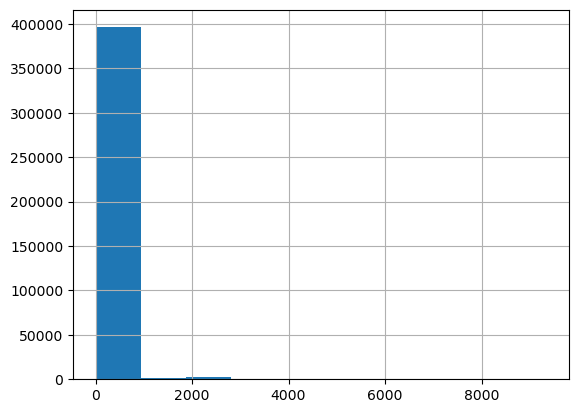

In [20]:
dataset['driver_gps_accuracy'].hist()

In [21]:
dataset[dataset['driver_gps_accuracy'] > 20]

,event_timestamp,driver_id,participant_status,order_id,driver_latitude,driver_longitude,driver_gps_accuracy,trip_distance,pickup_latitude,pickup_longitude
95960,2015-05-16 12:14:21.571000+00:00,100854699543,ACCEPTED,343792243209,-2.951763,104.761388,21.000,4.462,-2.951713,104.761420
95961,2015-05-16 12:14:15.054000+00:00,100854699543,CREATED,343792243209,-2.951763,104.761388,21.000,4.462,-2.951713,104.761420
95962,2015-05-18 13:40:10.083000+00:00,104315146729,ACCEPTED,708273795030,-2.989352,104.717648,21.000,2.000,-2.989163,104.717500
95963,2015-05-18 13:40:08.824000+00:00,104315146729,CREATED,708273795030,-2.989352,104.717648,21.000,2.000,-2.989163,104.717500
95964,2015-05-15 08:41:46.967000+00:00,108442445101,ACCEPTED,247902358302,-2.951649,104.748777,21.000,1.295,-2.949856,104.747705
...,...,...,...,...,...,...,...,...,...,...
400099,2015-05-17 04:57:32.044000+00:00,868666321781,CREATED,807506644180,-2.988325,104.763972,26.942,4.386,-2.986718,104.763435
400100,2015-05-16 23:21:45.793000+00:00,438082052422,CREATED,368974774419,-2.985607,104.725295,27.942,3.166,-2.986433,104.723186
400101,2015-05-16 23:21:46.537000+00:00,438082052422,ACCEPTED,368974774419,-2.985607,104.725295,27.942,3.166,-2.986433,104.723186
400102,2015-05-15 01:01:54.751000+00:00,689026016592,IGNORED,991540131701,-3.035419,104.792624,79.893,13.556,-3.034194,104.792025


In [22]:
dataset[dataset['driver_gps_accuracy'] > 100]

,event_timestamp,driver_id,participant_status,order_id,driver_latitude,driver_longitude,driver_gps_accuracy,trip_distance,pickup_latitude,pickup_longitude
106832,2015-05-13 22:59:24.320000+00:00,145148497940,IGNORED,789346876713,-2.961621,104.817742,104.000,4.154,-2.963199,104.812203
106833,2015-05-13 22:59:09.305000+00:00,145148497940,CREATED,789346876713,-2.961621,104.817742,104.000,4.154,-2.963199,104.812203
106834,2015-05-13 06:10:34.152000+00:00,839308062132,CREATED,919982447408,-2.986168,104.786658,104.000,5.794,-2.986168,104.785378
106835,2015-05-13 06:10:34.633000+00:00,839308062132,ACCEPTED,919982447408,-2.986168,104.786658,104.000,5.794,-2.986168,104.785378
106836,2015-05-11 07:24:43.070000+00:00,153884677315,ACCEPTED,431641753916,-2.941050,104.767560,108.000,5.217,-2.941493,104.767678
...,...,...,...,...,...,...,...,...,...,...
399959,2015-05-16 09:46:42.695000+00:00,552959938048,ACCEPTED,624840524417,-2.968622,104.761873,103.018,1.378,-2.968677,104.761363
400006,2015-05-11 04:34:40.126000+00:00,980695006294,ACCEPTED,412325163607,-3.014212,104.752549,119.518,8.661,-3.013711,104.753647
400007,2015-05-11 04:34:39.448000+00:00,980695006294,CREATED,412325163607,-3.014212,104.752549,119.518,8.661,-3.013711,104.753647
400008,2015-05-16 04:49:08.479000+00:00,921403809466,CREATED,260837373705,-2.918256,104.805211,175.411,3.319,-2.913877,104.809135


In [ ]:
#What is the relation between driver_gps_accuracy and particpant status?

In [29]:
dataset.groupby('participant_status')['driver_gps_accuracy'].agg(['mean', 'median'])

,mean,median
participant_status,,
ACCEPTED,33.120061,6.000
CREATED,35.457024,6.068
IGNORED,57.255341,7.110
REJECTED,48.556033,5.000


In [30]:
dataset.groupby('participant_status')['trip_distance'].agg(['mean', 'median'])

,mean,median
participant_status,,
ACCEPTED,4.053117,3.172
CREATED,4.196099,3.307
IGNORED,5.466163,4.888
REJECTED,6.678039,6.186


In [39]:
display(dataset.groupby(['order_id', 'driver_id'])['participant_status'].value_counts().sort_values(ascending = False))

order_id      driver_id     participant_status
999995637211  953134659073  REJECTED              1
100004630900  576094811632  ACCEPTED              1
                            CREATED               1
100005695817  100995600755  ACCEPTED              1
                            CREATED               1
                                                 ..
100036491606  942718742957  ACCEPTED              1
100033089704  915594656664  CREATED               1
                            ACCEPTED              1
100024200607  747772570290  CREATED               1
                            ACCEPTED              1
Name: count, Length: 400104, dtype: int64

In [40]:
display(dataset.groupby(['order_id', 'driver_id'])['participant_status'].value_counts().sort_values(ascending = True))

order_id      driver_id     participant_status
999995536413  296006164700  CREATED               1
                            ACCEPTED              1
999990809802  505283434541  CREATED               1
                            ACCEPTED              1
999983585012  391356305418  CREATED               1
                                                 ..
999995637211  640314257845  ACCEPTED              1
                            CREATED               1
              953134659073  CREATED               1
                            REJECTED              1
100004630900  576094811632  ACCEPTED              1
Name: count, Length: 400104, dtype: int64

In [42]:
display(dataset.groupby(['order_id', 'driver_id'])['participant_status'].count().sort_values(ascending = True))

order_id      driver_id   
113860721318  238210291329    1
114311735213  651076418482    1
116607749802  346143124020    1
117127211303  479712995434    1
119033618016  381538151896    1
                             ..
999995637211  173842996771    2
              624115252932    2
              640314257845    2
              953134659073    2
100004630900  576094811632    2
Name: participant_status, Length: 200619, dtype: int64

In [43]:
display(dataset.groupby(['order_id', 'driver_id'])['participant_status'].count().sort_values(ascending = False))

order_id      driver_id   
999995637211  953134659073    2
100004630900  576094811632    2
100005695817  100995600755    2
100021292050  916245898577    2
100022287505  636669438942    2
                             ..
985941744809  828995311415    1
986056689318  114128846550    1
987210089411  659443690057    1
987461401215  386410564428    1
987429022180  726553569338    1
Name: participant_status, Length: 200619, dtype: int64

In [ ]:
no_created_event = dataset.groupby(['driver_id', 'order_id'])['participant_status'].apply(lambda x: 'CREATED' not in x.values)
no_created_event.sum()

np.int64(0)

In [53]:
dataset[(dataset['order_id'] == 999995637211) & ( dataset['driver_id'] == 953134659073)].sort_values(by ='event_timestamp')

,event_timestamp,driver_id,participant_status,order_id,driver_latitude,driver_longitude,driver_gps_accuracy,trip_distance,pickup_latitude,pickup_longitude
83763,2015-05-11 10:28:44.222000+00:00,953134659073,CREATED,999995637211,-2.983933,104.767252,12.0,11.848,-2.981028,104.767075
83762,2015-05-11 10:28:50.716000+00:00,953134659073,REJECTED,999995637211,-2.983933,104.767252,12.0,11.848,-2.981028,104.767075


In [54]:
dataset

,event_timestamp,driver_id,participant_status,order_id,driver_latitude,driver_longitude,driver_gps_accuracy,trip_distance,pickup_latitude,pickup_longitude
0,2015-05-18 11:45:19.519000+00:00,110283102582,CREATED,938125906616,-2.981389,104.761898,2.000,5.601,-2.980337,104.761200
1,2015-05-18 11:45:29.800000+00:00,110283102582,ACCEPTED,938125906616,-2.981389,104.761898,2.000,5.601,-2.980337,104.761200
2,2015-05-11 10:35:57.021000+00:00,126346998414,CREATED,992080359113,-2.966915,104.748040,2.000,1.744,-2.968359,104.749344
3,2015-05-11 10:36:01.148000+00:00,126346998414,ACCEPTED,992080359113,-2.966915,104.748040,2.000,1.744,-2.968359,104.749344
4,2015-05-16 12:34:20.044000+00:00,199325048812,ACCEPTED,797723880713,-3.014740,104.694647,2.000,2.505,-3.013223,104.700030
...,...,...,...,...,...,...,...,...,...,...
400099,2015-05-17 04:57:32.044000+00:00,868666321781,CREATED,807506644180,-2.988325,104.763972,26.942,4.386,-2.986718,104.763435
400100,2015-05-16 23:21:45.793000+00:00,438082052422,CREATED,368974774419,-2.985607,104.725295,27.942,3.166,-2.986433,104.723186
400101,2015-05-16 23:21:46.537000+00:00,438082052422,ACCEPTED,368974774419,-2.985607,104.725295,27.942,3.166,-2.986433,104.723186
400102,2015-05-15 01:01:54.751000+00:00,689026016592,IGNORED,991540131701,-3.035419,104.792624,79.893,13.556,-3.034194,104.792025


In [56]:
dataset['trip_distance'].describe()

count    400104.000000
mean          4.195605
std           3.166214
min           0.001000
25%           1.833000
50%           3.307000
75%           5.774000
max          29.730000
Name: trip_distance, dtype: float64

<Axes: >

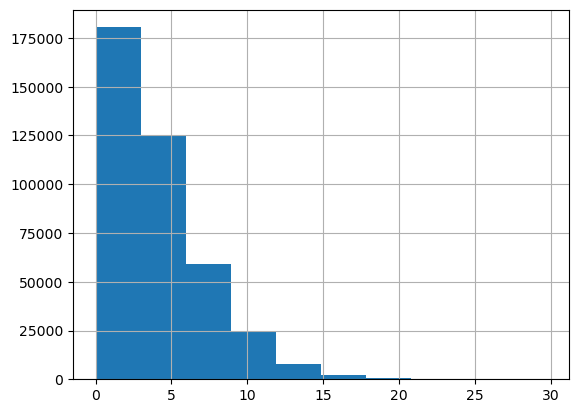

In [57]:
dataset['trip_distance'].hist()

In [ ]:
#Calculating hour of the day and the haversine distance between driver and pickup location

In [66]:
def driver_distance_to_pickup(df: pd.DataFrame) -> pd.DataFrame:
	df["driver_distance"] = df.apply(
		lambda r: haversine(
			(r["driver_latitude"], r["driver_longitude"]),
			(r["pickup_latitude"], r["pickup_longitude"]),
		),
		axis=1,
	)
	return df

def hour_of_day(df: pd.DataFrame) -> pd.DataFrame:
	df["event_hour"] = df["event_timestamp"].dt.hour
	return df


In [67]:
dataset_hour_pickupdist = dataset.pipe(driver_distance_to_pickup).pipe(hour_of_day)
dataset_hour_pickupdist

,event_timestamp,driver_id,participant_status,order_id,driver_latitude,driver_longitude,driver_gps_accuracy,trip_distance,pickup_latitude,pickup_longitude,driver_distance,event_hour
0,2015-05-18 11:45:19.519000+00:00,110283102582,CREATED,938125906616,-2.981389,104.761898,2.000,5.601,-2.980337,104.761200,0.140289,11.0
1,2015-05-18 11:45:29.800000+00:00,110283102582,ACCEPTED,938125906616,-2.981389,104.761898,2.000,5.601,-2.980337,104.761200,0.140289,11.0
2,2015-05-11 10:35:57.021000+00:00,126346998414,CREATED,992080359113,-2.966915,104.748040,2.000,1.744,-2.968359,104.749344,0.216266,10.0
3,2015-05-11 10:36:01.148000+00:00,126346998414,ACCEPTED,992080359113,-2.966915,104.748040,2.000,1.744,-2.968359,104.749344,0.216266,10.0
4,2015-05-16 12:34:20.044000+00:00,199325048812,ACCEPTED,797723880713,-3.014740,104.694647,2.000,2.505,-3.013223,104.700030,0.621096,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
400099,2015-05-17 04:57:32.044000+00:00,868666321781,CREATED,807506644180,-2.988325,104.763972,26.942,4.386,-2.986718,104.763435,0.188451,4.0
400100,2015-05-16 23:21:45.793000+00:00,438082052422,CREATED,368974774419,-2.985607,104.725295,27.942,3.166,-2.986433,104.723186,0.251571,23.0
400101,2015-05-16 23:21:46.537000+00:00,438082052422,ACCEPTED,368974774419,-2.985607,104.725295,27.942,3.166,-2.986433,104.723186,0.251571,23.0
400102,2015-05-15 01:01:54.751000+00:00,689026016592,IGNORED,991540131701,-3.035419,104.792624,79.893,13.556,-3.034194,104.792025,0.151590,1.0


In [69]:
dataset_hour_pickupdist[['event_hour', 'driver_distance']].describe()

,event_hour,driver_distance
count,399755.000000,400104.000000
mean,7.988871,0.286918
std,6.017602,0.238163
min,0.000000,0.000000
25%,4.000000,0.093200
50%,7.000000,0.237005
75%,10.000000,0.409713
max,23.000000,0.999995


In [74]:
dataset_hour_pickupdist[dataset_hour_pickupdist.isnull()]

,event_timestamp,driver_id,participant_status,order_id,driver_latitude,driver_longitude,driver_gps_accuracy,trip_distance,pickup_latitude,pickup_longitude,driver_distance,event_hour
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
400099,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400100,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400101,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400102,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
dataset_hour_pickupdist = dataset_hour_pickupdist.dropna()

In [79]:
dataset_hour_pickupdist.groupby(['participant_status'])['driver_distance'].agg(['mean', 'median'])

,mean,median
participant_status,,
ACCEPTED,0.280079,0.231830
CREATED,0.287084,0.237092
IGNORED,0.350132,0.297927
REJECTED,0.358867,0.304941


In [83]:
dataset_hour_pickupdist.groupby('participant_status')['event_hour'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

participant_status
ACCEPTED     9.0
CREATED      9.0
IGNORED     10.0
REJECTED    10.0
Name: event_hour, dtype: float64

In [84]:
dataset_hour_pickupdist

,event_timestamp,driver_id,participant_status,order_id,driver_latitude,driver_longitude,driver_gps_accuracy,trip_distance,pickup_latitude,pickup_longitude,driver_distance,event_hour
0,2015-05-18 11:45:19.519000+00:00,110283102582,CREATED,938125906616,-2.981389,104.761898,2.000,5.601,-2.980337,104.761200,0.140289,11.0
1,2015-05-18 11:45:29.800000+00:00,110283102582,ACCEPTED,938125906616,-2.981389,104.761898,2.000,5.601,-2.980337,104.761200,0.140289,11.0
2,2015-05-11 10:35:57.021000+00:00,126346998414,CREATED,992080359113,-2.966915,104.748040,2.000,1.744,-2.968359,104.749344,0.216266,10.0
3,2015-05-11 10:36:01.148000+00:00,126346998414,ACCEPTED,992080359113,-2.966915,104.748040,2.000,1.744,-2.968359,104.749344,0.216266,10.0
4,2015-05-16 12:34:20.044000+00:00,199325048812,ACCEPTED,797723880713,-3.014740,104.694647,2.000,2.505,-3.013223,104.700030,0.621096,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
400099,2015-05-17 04:57:32.044000+00:00,868666321781,CREATED,807506644180,-2.988325,104.763972,26.942,4.386,-2.986718,104.763435,0.188451,4.0
400100,2015-05-16 23:21:45.793000+00:00,438082052422,CREATED,368974774419,-2.985607,104.725295,27.942,3.166,-2.986433,104.723186,0.251571,23.0
400101,2015-05-16 23:21:46.537000+00:00,438082052422,ACCEPTED,368974774419,-2.985607,104.725295,27.942,3.166,-2.986433,104.723186,0.251571,23.0
400102,2015-05-15 01:01:54.751000+00:00,689026016592,IGNORED,991540131701,-3.035419,104.792624,79.893,13.556,-3.034194,104.792025,0.151590,1.0


<Axes: xlabel='event_hour', ylabel='driver_gps_accuracy'>

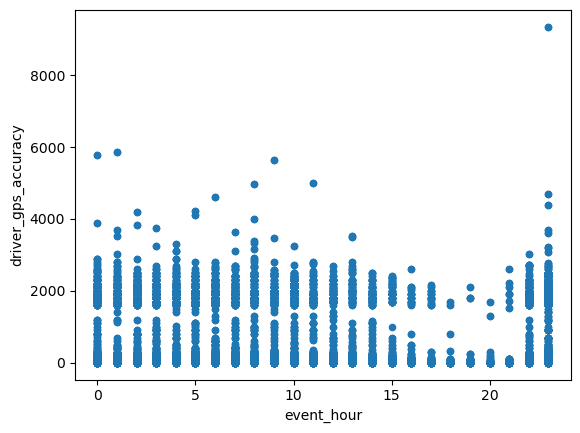

In [ ]:
dataset_hour_pickupdist.plot.scatter(x='event_hour', y='driver_gps_accuracy')

In [94]:
dataset_hour_pickupdist['trip_to_driver_distance_ratio'] = dataset_hour_pickupdist['driver_distance']/dataset_hour_pickupdist['trip_distance']
dataset_hour_pickupdist['trip_to_driver_distance_ratio'].describe()

/tmp/ipykernel_50265/4081357096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_hour_pickupdist['trip_to_driver_distance_ratio'] = dataset_hour_pickupdist['driver_distance']/dataset_hour_pickupdist['trip_distance']


count    399755.000000
mean          0.155765
std           3.740703
min           0.000000
25%           0.027189
50%           0.063348
75%           0.126604
max         856.705248
Name: trip_to_driver_distance_ratio, dtype: float64

In [95]:
dataset_hour_pickupdist['trip_distance'].min()

0.0010000000474974

In [100]:
dataset_hour_pickupdist['trip_distance'].max()

29.729999542236328

In [97]:
dataset_hour_pickupdist['trip_distance'].sort_values()[:100,]

347791    0.001
240800    0.001
240799    0.001
195883    0.001
349641    0.001
          ...  
234976    0.006
234977    0.006
359197    0.006
278355    0.006
149200    0.006
Name: trip_distance, Length: 100, dtype: float64

<Axes: >

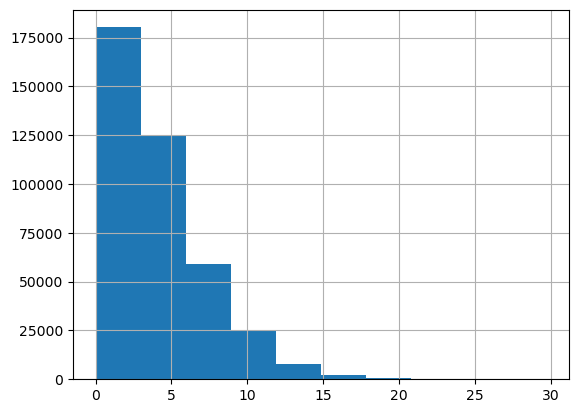

In [103]:
dataset_hour_pickupdist['trip_distance'].hist()

<Axes: >

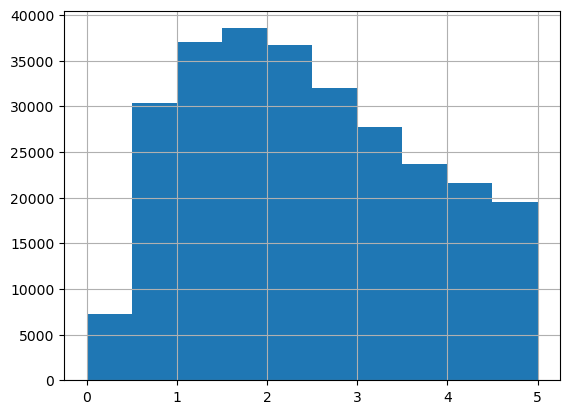

In [104]:
dataset_hour_pickupdist[dataset_hour_pickupdist['trip_distance'] < 5]['trip_distance'].hist()

In [102]:
dataset_hour_pickupdist['trip_distance'].describe()

count    399755.000000
mean          4.195720
std           3.166235
min           0.001000
25%           1.833000
50%           3.307000
75%           5.774000
max          29.730000
Name: trip_distance, dtype: float64

In [93]:
dataset_hour_pickupdist[dataset_hour_pickupdist['driver_distance'] == 0]

,event_timestamp,driver_id,participant_status,order_id,driver_latitude,driver_longitude,driver_gps_accuracy,trip_distance,pickup_latitude,pickup_longitude,driver_distance,event_hour,trip_to_driver_distance_ratio
3513,2015-05-12 02:24:22.112000+00:00,162031991623,ACCEPTED,208514119305,-2.966897,104.748923,3.000,3.441,-2.966897,104.748923,0.0,2.0,inf
3519,2015-05-12 02:24:13.833000+00:00,162031991623,CREATED,208514119305,-2.966897,104.748923,3.000,3.441,-2.966897,104.748923,0.0,2.0,inf
5776,2015-05-11 04:41:13.042000+00:00,206886356139,IGNORED,539422414711,-2.966897,104.748923,3.000,3.328,-2.966897,104.748923,0.0,4.0,inf
5777,2015-05-15 03:40:45.255000+00:00,206886356139,CREATED,724063761707,-2.966897,104.748923,3.000,3.455,-2.966897,104.748923,0.0,3.0,inf
5778,2015-05-11 04:40:58.029000+00:00,206886356139,CREATED,539422414711,-2.966897,104.748923,3.000,3.328,-2.966897,104.748923,0.0,4.0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...
306208,2015-05-12 10:00:08.120000+00:00,864479523295,ACCEPTED,361778868905,-2.976377,104.740889,0.100,3.728,-2.976377,104.740889,0.0,10.0,inf
306209,2015-05-12 11:10:29.916000+00:00,864479523295,CREATED,262224615613,-2.976377,104.740889,0.100,1.167,-2.976377,104.740889,0.0,11.0,inf
306210,2015-05-10 10:06:51.673000+00:00,864479523295,ACCEPTED,134931987108,-2.976377,104.740889,0.100,2.280,-2.976377,104.740889,0.0,10.0,inf
396958,2015-05-16 11:36:55.602000+00:00,129942003786,ACCEPTED,446285671615,-2.908031,104.681740,11.288,1.187,-2.908031,104.681740,0.0,11.0,inf


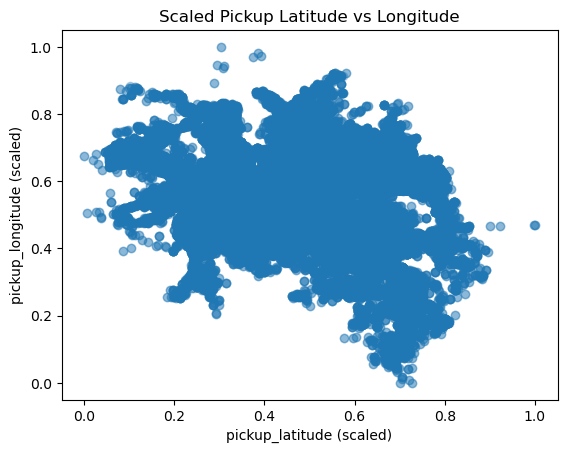

In [105]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(dataset_hour_pickupdist[['pickup_latitude', 'pickup_longitude']])
plt.pyplot.scatter(scaled[:, 0], scaled[:, 1], alpha=0.3)
plt.pyplot.xlabel('pickup_latitude (scaled)')
plt.pyplot.ylabel('pickup_longitude (scaled)')
plt.pyplot.title('Scaled Pickup Latitude vs Longitude')
plt.pyplot.show()